In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
#from keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.vis_utils import model_to_dot

os.environ['HTTP_PROXY'] = 'http://cachesrv.biwako.shiga-u.ac.jp:8080'

Using TensorFlow backend.


In [2]:
b_size = 200
n_classes = 10
n_hidden = 200
n_epoch = 5

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
img_size = 28

X_train = X_train.reshape(X_train.shape[0], img_size**2).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], img_size**2).astype('float32')/255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


/Users/mikio/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


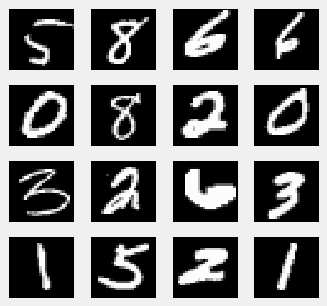

In [4]:
def draw_digit3(data, n, numbers_size, title=None):
    plt.subplot(numbers_size, numbers_size, n)
    Z = data.reshape(img_size, img_size)
    Z = Z[::-1,:]
    plt.xlim(0, img_size-1)
    plt.ylim(0, img_size-1)
    plt.pcolor(Z)
    if title is not None:
        plt.title(title, size=9)
    plt.gray()
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    
plt.style.use('fivethirtyeight')
numbers_size = 4
plt.figure(figsize=(5, 5))
for cnt, idx in enumerate(np.random.permutation(len(X_train))[:numbers_size**2]):
    draw_digit3(X_train[idx], cnt+1, numbers_size)

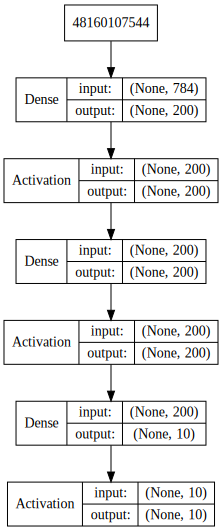

In [12]:
model = Sequential()

model.add(Dense(n_hidden, input_dim=img_size*img_size))
model.add(Activation('relu'))
model.add(Dense(n_hidden))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test,
                                                                                          Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3463 - acc: 0.8978 - val_loss: 0.1539 - val_acc: 0.9529
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1371 - acc: 0.9595 - val_loss: 0.1225 - val_acc: 0.9615
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0925 - acc: 0.9722 - val_loss: 0.0930 - val_acc: 0.9709
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0690 - acc: 0.9795 - val_loss: 0.0764 - val_acc: 0.9754
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0544 - acc: 0.9835 - val_loss: 0.0728 - val_acc: 0.9775


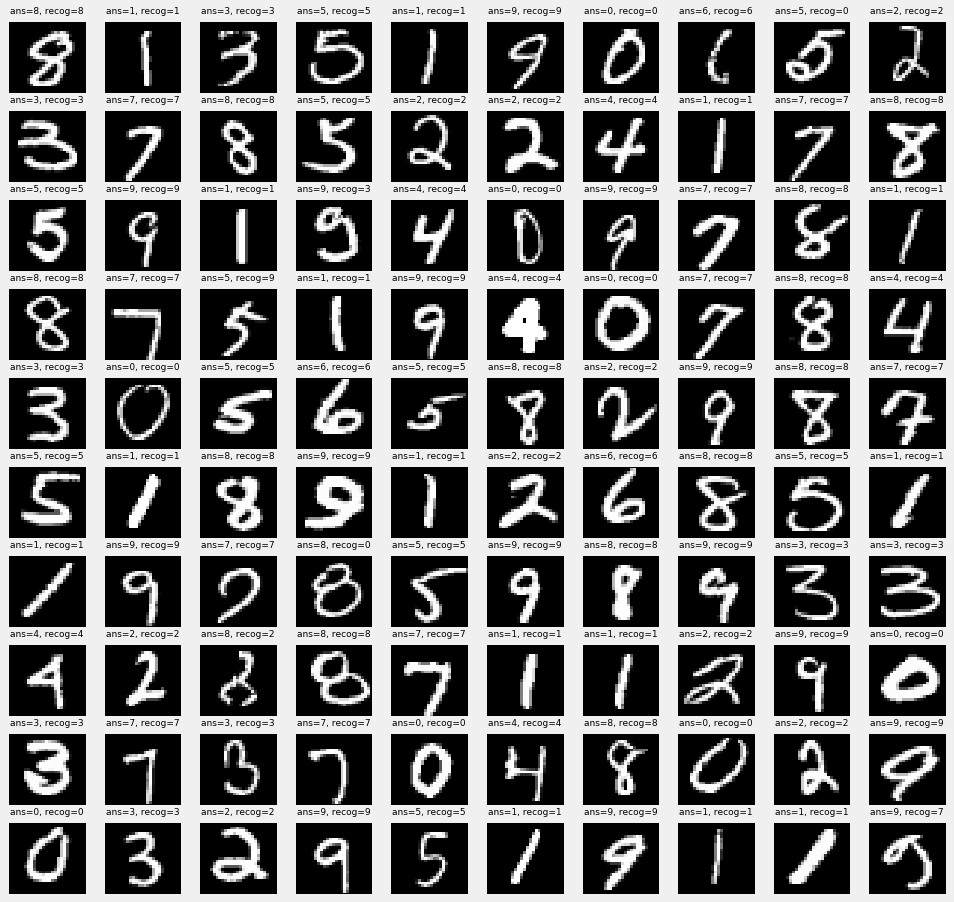

In [14]:
numbers_size = 10
plt.figure(figsize=(15, 15))
for cnt, idx in enumerate(np.random.permutation(len(X_test))[:numbers_size**2]):
    y = model.predict(X_test[int(idx):int(idx)+1], batch_size=1, verbose=0)
    draw_digit3(X_test[idx], cnt+1, numbers_size, "ans=%d, recog=%d"%(y_test[idx], np.argmax(y.data)))

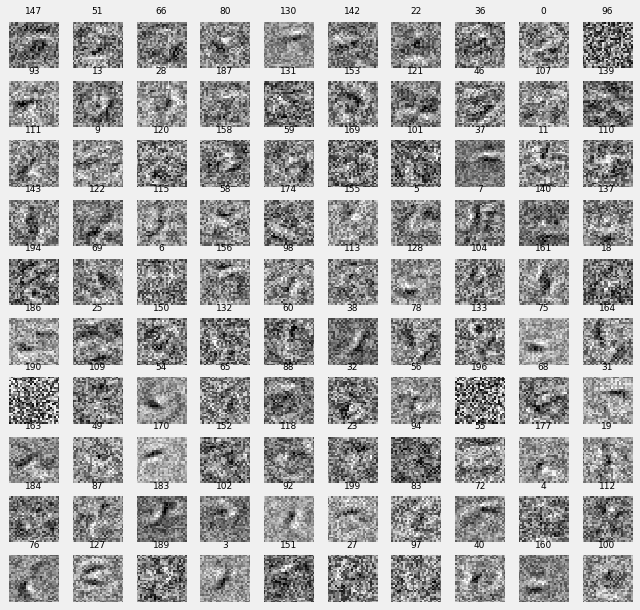

In [16]:
plt.figure(figsize=(10, 10))
for cnt, i in enumerate(np.random.permutation(n_hidden)[:numbers_size**2]):
    draw_digit3(model.layers[0].get_weights()[0].T[i], cnt+1, numbers_size, "%d"%i)
    

In [11]:
plt.figure(figsize=(10, 10))
for cnt, i in enumerate(np.random.permutation(n_hidden)[:numbers_size**2]):
    draw_digit3(model.layers[1].get_weights()[0].T[i], cnt+1, numbers_size, "%d"%i)

IndexError: list index out of range

<Figure size 720x720 with 0 Axes>